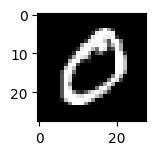

In [ ]:
import numpy as np, sys
from keras.datasets import mnist
from matplotlib import pyplot

np.random.seed(1)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

pyplot.subplot(330+1)
pyplot.imshow(x_train[1], cmap=pyplot.get_cmap('gray'))
pyplot.show()

images, labels = (x_train[0:1000].reshape(1000, 28*28)/255, y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))

for i,l in enumerate(labels):
  one_hot_labels[i,l] = 1
labels = one_hot_labels

test_img = x_test.reshape(len(x_test), 28*28) / 255
test_labels = np.zeros((len(y_test), 10))
for i,l in enumerate(y_test):
  test_labels[i,l] = 1


alpha, itr, hid_size = (0.005, 300, 40)
px_per_img, n_lab = (784, 10)

weights_01 = 0.2*np.random.random((px_per_img, hid_size)) - 0.1
weights_12 = 0.2*np.random.random((hid_size, n_lab)) - 0.1

def relu(x):
  return (x >= 0)*x

def relu2deriv(output):
  return output >= 0

In [ ]:
for j in range(itr):
  error, correct_cnt = (0.0, 0)

  for i in range(len(images)):
    layer_0 = images[i:i+1]
    layer_1 = relu(np.dot(layer_0, weights_01))
    dropout_mask = np.random.randint(2, size=layer_1.shape)
    layer_1 *= dropout_mask * 2
    layer_2 = np.dot(layer_1, weights_12)

    error += np.sum((labels[i:i+1] - layer_2)**2)
    correct_cnt +=  int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

    layer_2_delta = (labels[i:i+1] - layer_2)
    layer_1_delta = layer_2_delta.dot(weights_12.T) * relu2deriv(layer_1)
    layer_1_delta *= dropout_mask
    weights_12 += alpha*layer_1.T.dot(layer_2_delta)
    weights_01 += alpha*layer_0.T.dot(layer_1_delta)

  if(j%10 == 0):
    test_error = 0.0
    test_correct_cnt = 0

    for i in range(len(test_img)):
      layer_0 = test_img[i:i+1]
      layer_1 = relu(np.dot(layer_0, weights_01))
      layer_2 = np.dot(layer_1, weights_12)

      test_error += np.sum((test_labels[i:i+1] - layer_2)**2)
      test_correct_cnt +=  int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

    sys.stdout.write("\n" + \
    "I:" + str(j) + \
    " Test-Err:" + str(test_error/ float(len(test_img)))[0:5] +\
    " Test-Acc:" + str(test_correct_cnt/ float(len(test_img)))+\
    " Train-Err:" + str(error/ float(len(images)))[0:5] +\
    " Train-Acc:" + str(correct_cnt/ float(len(images))))





I:0 Test-Err:0.718 Test-Acc:0.5418 Train-Err:0.885 Train-Acc:0.289
I:10 Test-Err:0.501 Test-Acc:0.7365 Train-Err:0.564 Train-Acc:0.647
I:20 Test-Err:0.478 Test-Acc:0.7621 Train-Err:0.530 Train-Acc:0.681
I:30 Test-Err:0.457 Test-Acc:0.7915 Train-Err:0.508 Train-Acc:0.71
I:40 Test-Err:0.445 Test-Acc:0.7998 Train-Err:0.492 Train-Acc:0.719
I:50 Test-Err:0.430 Test-Acc:0.8145 Train-Err:0.462 Train-Acc:0.742
I:60 Test-Err:0.446 Test-Acc:0.7974 Train-Err:0.472 Train-Acc:0.746
I:70 Test-Err:0.445 Test-Acc:0.7901 Train-Err:0.463 Train-Acc:0.744
I:80 Test-Err:0.426 Test-Acc:0.8105 Train-Err:0.461 Train-Acc:0.764
I:90 Test-Err:0.435 Test-Acc:0.7871 Train-Err:0.462 Train-Acc:0.749
I:100 Test-Err:0.433 Test-Acc:0.8039 Train-Err:0.452 Train-Acc:0.769
I:110 Test-Err:0.435 Test-Acc:0.8099 Train-Err:0.439 Train-Acc:0.778
I:120 Test-Err:0.442 Test-Acc:0.7871 Train-Err:0.451 Train-Acc:0.778
I:130 Test-Err:0.439 Test-Acc:0.811 Train-Err:0.452 Train-Acc:0.783
I:140 Test-Err:0.443 Test-Acc:0.8049 Train-Err